In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
from dnn_utils import *
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:

def get_images(image_path,label):
    list_images = []
    Y = []
    for image in os.listdir(image_path):
        if image.endswith(".jpg"):
            img_path = os.path.join(image_path,image)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))
            list_images.append(img)
            Y.append(label)

    return list_images,Y

In [25]:
# loading cat images
image_path = r'/content/drive/MyDrive/dataset/dataset/cats'
X, Y = get_images(image_path,1)
X = np.array(X)
Y = np.array(Y)
Y = Y.reshape(-1,1)

# loading dog images
image_path2 = r'/content/drive/MyDrive/dataset/dataset/dogs'
X1, Y1 = get_images(image_path2,0)
X1 = np.array(X1)
Y1 = np.array(Y1)
Y1 = Y1.reshape(-1,1)

# combining both cats and dogs images
X = np.concatenate((X,X1),axis=0)
Y = np.vstack((Y,Y1))
print (X.shape)

(2022, 128, 128, 3)


In [26]:
# Generate the same permutation for both
np.random.seed(1)
perm = np.random.permutation(len(X))
X = X.astype(np.float32)/255.0
X = X[perm]
Y = Y[perm]

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

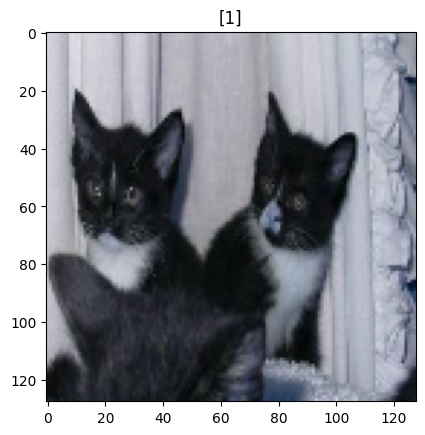

In [28]:
plt.imshow(X_train[0])
plt.title(Y_train[0])
plt.show()

In [29]:
X_train = (X_train.reshape(-1,128*128*3)).T
X_test = (X_test.reshape(-1,128*128*3)).T
Y_train = Y_train.T
Y_test = Y_test.T

In [30]:
X_train.shape

(49152, 1617)

In [34]:
# Define the layer dimensions
layer_dim = [49152,64, 32, 16, 1]

# Call the function
parameters = initialize_parameters_deep(layer_dim)
print(len(parameters)//2)

4


In [ ]:
def L_layered_model(X, Y, layer_dim, learning_rate = 0.0001, num_epochs = 500, print_cost = False ):

    # intializing parameters
    parameter = initialize_parameters_deep(layer_dim)

    total_cost = []

    for i in range(0,num_epochs):
        #Forward propagation
        AL, caches = L_model_forward(X,parameter)

        # compute cost
        cost = compute_cost (AL, Y)
        if (i%100) == 0:
            total_cost.append(cost)
            if print_cost:
                print(f"iter {i} : {cost}")




        # Backward Propagation
        grads = L_model_backward(AL, Y, caches)


        # update parameters
        parameter = update_parameter(parameter, grads, learning_rate)




    plt.plot(np.squeeze(total_cost))
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameter




iter 0 : 0.7248142476580963
iter 100 : 0.6867763968459498
iter 200 : 0.6798316788683153
iter 300 : 0.6744809276369119
iter 400 : 0.6700504587516147


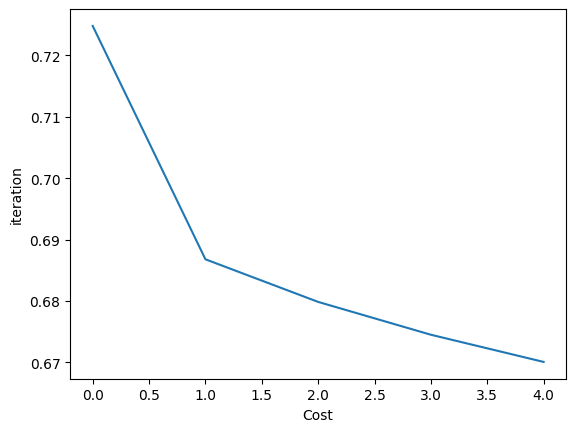

In [36]:
parameter = L_layered_model(X_train,Y_train,layer_dim,learning_rate=0.0001,num_epochs=500,print_cost=True)

In [37]:
pred = predict(X_test,Y_test,parameter)
assert(pred.shape == Y_test.shape)

In [38]:
print(pred.shape)
print(Y_test.shape)

(1, 405)
(1, 405)


In [39]:
# Accuracy calculation
accuracy = np.mean(Y_test == pred)
print("Accuracy:", accuracy)

Accuracy: 0.5506172839506173


In [40]:
pred = predict(X_train,Y_train,parameter)
assert(pred.shape == Y_train.shape)

In [42]:
# Accuracy calculation
accuracy = np.mean(Y_train == pred)
print("Accuracy:", accuracy)

Accuracy: 0.6134817563388992
